# CAPSTONE 2 PROJECT - Predicting US Life Expectancy
# Data Wrangling

---

### Table of Contents

* [1. Introduction](#chapter1)
* [2. Importing libraries](#chapter2)
* [3. Data Loading and Joining](#chapter3)
    * [Life Expectancy at Birth](#life)
    * [US State and County FIPS code data](#fips)
    * [US State and County Unemployment data](#employment)
    * [US State and County Education Attainment data](#education)
    * [US State and County Poverty and Income data](#poverty)
* [4. Saving data](#saving)
*[5. Summary](#summary)

<a class="anchor" id="chapter1"></a>

### Introduction

The purpose of this project is to model life expectancy at birth using education, income, poverty, and unemployment data for the United States.

Life expectancy is often used as a measure of a country's socioeconomic development.  Many factors go into life expectancy.  This project is purposefully limited to the factors of income, education, poverty levels, and unemployment.

### Data Wrangling Objective

The objective of the following data wrangling notebook is to examine the data for completeness, understand the structure of the data, and assemble the data into a tidy format ready for exploratory data analysis.


#### Footnotes:

The data used in this project were obtained from the following websites:
    
[^1]: [CDC US Life Expectancy Data](https://www.cdc.gov/nchs/nvss/usaleep/usaleep.html)

[^2]: [USDA Economic Research Service](https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/)

[^3]: [US Census State and County FIPS Codes](https://www.census.gov/geographies/reference-files/2017/demo/popest/2017-fips.html)



    
    

<a class="anchor" id="chapter2"></a>
### Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns


%matplotlib inline

# Data Loading and Joining <a class="anchor" id="chapter3"></a>

In [38]:
# Import life expectancy tables.
# 11-digit Tract ID consists is a concatenation of three numerical codes:
# 2-digit state FIPS code, 3-digit county FIPS code, and 6-digit census tract number.
# e(0) is the life expectancy at birth.  this is the target value.

df_mortality = pd.read_csv('./capstone_2_project_data_files/US_A.csv')
df_mortality.head()

,Tract ID,STATE2KX,CNTY2KX,TRACT2KX,e(0),se(e(0)),Abridged life table flag
0,1001020100,1,1,20100,73.1,2.2348,3
1,1001020200,1,1,20200,76.9,3.3453,3
2,1001020400,1,1,20400,75.4,1.0216,3
3,1001020500,1,1,20500,79.4,1.1768,1
4,1001020600,1,1,20600,73.1,1.5519,3


<a class="anchor" id="life"></a>

## df_mortality Column variable name and Description

- There are 49 unique values in the STATE2KX column. 
&nbsp;  
 

|Column variable name|Description|
|:--|:--|
|FIPStxt|State-county FIPS code|
|Tract ID|Concatenation of 2-digit state FIPS code, 3- digit county FIPS code, and 6-digit census tract number|
|STATE2KX|Census 2010 FIPS State Code (2-digit numeric with leading zeros significant)|
|CNTY2KX|Census 2010 FIPS County Code (3-digit numeric with leading zeros significant)|
|TRACT2KX|Census 2010 Tract (contains leading zeros with the decimal point implied)|
|𝑒(0)|Life expectancy at birth|
|𝑠𝑒(𝑒(0))|Standard error of life expectancy at birth|
|Abridged life table|Flag to indicate the source of the age-specific death rates used to calculate the abridged, period life tables|
||flag 1 = Observed age-specific death rates for all age groups|
||flag 2 = Predicted age-specific death rates for all age groups|
||flag 3 = Combination of observed and predicted age-specific death rates|



In [39]:
# Inspect df_mortality for zero non-null values.  No non-null values in df_mortality
df_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65662 entries, 0 to 65661
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tract ID                  65662 non-null  int64  
 1   STATE2KX                  65662 non-null  int64  
 2   CNTY2KX                   65662 non-null  int64  
 3   TRACT2KX                  65662 non-null  int64  
 4   e(0)                      65662 non-null  float64
 5   se(e(0))                  65662 non-null  float64
 6   Abridged life table flag  65662 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 3.5 MB


In [40]:
#  There are 49 unique values in the STATE2KX column.  There are 50 US States.  Not all US States are represented
#  in the dataset.

print(len(df_mortality.STATE2KX.unique()))
df_mortality.STATE2KX.unique()

49


array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56])

In [41]:
df_mortality.sample(5)

,Tract ID,STATE2KX,CNTY2KX,TRACT2KX,e(0),se(e(0)),Abridged life table flag
4282,6033000702,6,33,702,71.0,1.6149,3
19130,17019010400,17,19,10400,75.9,1.0744,3
24549,20111000800,20,111,800,77.9,2.2871,3
34544,29077004900,29,77,4900,80.9,1.6855,3
22090,18011810400,18,11,810400,74.4,1.0440,2


## Histogram Visualization of e(0)

- Distribution appears to be normal with a classic bell-shape.

In [42]:
# plotly histogram using plotly express
fig = px.histogram(data_frame = df_mortality, x = 'e(0)', nbins = 100)

# plot title
#fig.update_layout({'title':{'text':'U.S. Life Expectancy at Birth, e(0), Distribution','xref':'paper', 'x':0.5}})
#fig.update_xaxes(title_text="Life Expectancy at Birth (years)")

# display plot

fig.show()


In [ ]:
# Seaborn Count Plot Version



### US State and County FIPS code data <a class="anchor" id="idFIPS"></a>

- df_county contains State and County Name values for 50 US States and District of Columbia
- df_state contains 57 unique values for STATE_NAME.  df_state contains same df_county infomation plus additonal areas. Additional areas include: 'American Samoa','Guam', 'Northern Mariana Islands', 'Puerto Rico', 'U.S. Minor Outlying Islands', 'U.S. Virgin Islands'

In [43]:
# import US State and County FIPS code data 
df_county = pd.read_excel('./capstone_2_project_data_files/US_FIPS_Codes.xls', header = 1)
df_county = df_county.rename(columns={"FIPS State": "STATE2KX"})
df_county = df_county.rename(columns={"FIPS County": "CNTY2KX"})
df_county.head(5)
df_county.sample(5)

,State,County Name,STATE2KX,CNTY2KX
1478,Mississippi,Yalobusha,28,161
3099,Wisconsin,Richland,55,103
486,Georgia,Monroe,13,207
2875,Virginia,Middlesex,51,119
2439,Tennessee,Cocke,47,29


In [44]:
df_county.isna().sum()
print(len(df_county.State.unique()))  #Number of unique 'State' values in df_county.  50 US State plus District of Columbia
df_county.State.unique()

51


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [45]:
#import US State FIPS code data

df_state = pd.read_csv('./capstone_2_project_data_files/StatesFIPSCodes.csv')
print(len(df_state.STATE_NAME.unique())) #Fifty-seven unique 'STATE_NAME' values in df_state.  
df_state.sample(5)

57


,STATE_FIPS,STUSAB,STATE_NAME,STATENS
9,12,FL,Florida,294478
44,49,UT,Utah,1455989
29,33,NH,New Hampshire,1779794
40,45,SC,South Carolina,1779799
47,53,WA,Washington,1779804


In [46]:
# Check difference in 'State' values between df_county(51) and df_state(57).  Which States are represented in the data?
set(df_state.STATE_NAME.unique()) - set(df_county.State.unique())  #Additional areas in df_state not found in df_state


{'American Samoa',
 'Guam',
 'Northern Mariana Islands',
 'Puerto Rico',
 'U.S. Minor Outlying Islands',
 'U.S. Virgin Islands'}

In [47]:
df_state.isna().sum()

STATE_FIPS    0
STUSAB        0
STATE_NAME    0
STATENS       0
dtype: int64

In [48]:
#rename 'STATE_FIPS' columns to match df_mortality['STATE2KX']

df_state = df_state.rename(columns={"STATE_FIPS": "STATE2KX", 'STATE_NAME':'State'})
df_state.sample(5)

,STATE2KX,STUSAB,State,STATENS
51,60,AS,American Samoa,1802701
34,38,ND,North Dakota,1779797
19,23,ME,Maine,1779787
0,1,AL,Alabama,1779775
15,19,IA,Iowa,1779785


### Merge df_mortality, df_state, and df_county dataframes.  

 - The life expectancy for each Tract ID now linked to a US State and county.
 - Ten entries were unable to be joined to a US State and county.  These ten entries are located in Arkansas and Alaska.

In [49]:
# merge df_mortality and df_county based on 'STATE2KX', 'CNTY2KX' columns. define df_mortaliby_b for 
# checking merge results
df_mortality_b = df_mortality.merge(df_county, on =['STATE2KX', 'CNTY2KX'], how = 'left')

# merge df_mortality and df_state based on 'State'
df_mortality_b = df_mortality_b.merge(df_state, on =['State'], how = 'left')
df_mortality_b.sample(5)

,Tract ID,STATE2KX_x,CNTY2KX,TRACT2KX,e(0),se(e(0)),Abridged life table flag,State,County Name,STATE2KX_y,STUSAB,STATENS
19114,17019001204,17,19,1204,84.5,2.9685,3,Illinois,Champaign,17.0,IL,1779784.0
8267,6071002902,6,71,2902,77.7,1.4086,3,California,San Bernardino,6.0,CA,1779778.0
33573,28003950200,28,3,950200,77.2,1.2474,1,Mississippi,Alcorn,28.0,MS,1779790.0
46982,39041010422,39,41,10422,76.7,1.0829,3,Ohio,Delaware,39.0,OH,1085497.0
61751,49049010104,49,49,10104,79.9,3.8888,2,Utah,Utah,49.0,UT,1455989.0


In [50]:
# Number of 'State' unique values is greater than number of 'STATE2KX_x' unique values.

df_mortality_b.shape
print("There are {0} unique 'State' values".format(len(df_mortality_b['State'].unique())))
print("There are {0} unique 'STATE2KX_x' values".format(len(df_mortality_b['STATE2KX_x'].unique())))
print("The extra 'State' value is:{0}".format(set(df_mortality_b['State'].unique()) - set(df_state['State'].unique())))

#df_mortality_b[df_mortality_b['State']== NaN]
df_mortality_b.sort_values(['State'], ascending = True)

There are 50 unique 'State' values
There are 49 unique 'STATE2KX_x' values
The extra 'State' value is:{nan}


,Tract ID,STATE2KX_x,CNTY2KX,TRACT2KX,e(0),se(e(0)),Abridged life table flag,State,County Name,STATE2KX_y,STUSAB,STATENS
0,1001020100,1,1,20100,73.1,2.2348,3,Alabama,Autauga,1.0,AL,1779775.0
725,1097001200,1,97,1200,75.2,3.5146,3,Alabama,Mobile,1.0,AL,1779775.0
726,1097001302,1,97,1302,68.6,1.6224,3,Alabama,Mobile,1.0,AL,1779775.0
727,1097001400,1,97,1400,71.2,1.2770,2,Alabama,Mobile,1.0,AL,1779775.0
728,1097001501,1,97,1501,72.7,1.1508,2,Alabama,Mobile,1.0,AL,1779775.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2230000100,2,230,100,80.8,1.7952,2,NaN,NaN,NaN,NaN,NaN
1244,2275000300,2,275,300,78.7,0.9151,2,NaN,NaN,NaN,NaN,NaN
2928,5097953000,5,97,953000,74.2,1.6045,3,NaN,NaN,NaN,NaN,NaN
2929,5097953100,5,97,953100,76.8,1.7748,3,NaN,NaN,NaN,NaN,NaN


## Checking df_mortality_b for missing values.

- Ten entries located in either Alaska or Arkansas do not have 'County Name' values.

In [51]:
# isolate entries with NaN values for State and County Names.

df_na = df_mortality_b[df_mortality_b['State'].isna()]
df_na.sort_values(['STATE2KX_x', 'CNTY2KX'])

,Tract ID,STATE2KX_x,CNTY2KX,TRACT2KX,e(0),se(e(0)),Abridged life table flag,State,County Name,STATE2KX_y,STUSAB,STATENS
1176,2105000300,2,105,300,79.3,1.1460,2,NaN,NaN,NaN,NaN,NaN
1232,2195000200,2,195,200,84.6,2.0496,3,NaN,NaN,NaN,NaN,NaN
1233,2198000100,2,198,100,77.9,1.5294,2,NaN,NaN,NaN,NaN,NaN
1234,2198000200,2,198,200,79.0,0.9321,2,NaN,NaN,NaN,NaN,NaN
1235,2198940100,2,198,940100,76.7,1.3002,2,NaN,NaN,NaN,NaN,NaN
1238,2230000100,2,230,100,80.8,1.7952,2,NaN,NaN,NaN,NaN,NaN
1244,2275000300,2,275,300,78.7,0.9151,2,NaN,NaN,NaN,NaN,NaN
2928,5097953000,5,97,953000,74.2,1.6045,3,NaN,NaN,NaN,NaN,NaN
2929,5097953100,5,97,953100,76.8,1.7748,3,NaN,NaN,NaN,NaN,NaN
2930,5097953200,5,97,953200,80.0,2.3246,3,NaN,NaN,NaN,NaN,NaN


In [52]:
# 10 entries with 'State' and 'County Name' NaN values are located in Arkansas and Alaska.

df_state[df_state['STATE2KX'] == 2], df_state[df_state['STATE2KX'] == 5]

#df_county.sort_values(df_county[df_county['STATE2KX' == 5]])
#df_county[df_county['STATE2KX'] == 2].values

(   STATE2KX STUSAB   State  STATENS
 1         2     AK  Alaska  1785533,
    STATE2KX STUSAB     State  STATENS
 3         5     AR  Arkansas    68085)

## There are 338 Tract ID values in Alameda County.  Each tract has it's own life expectancy value.


In [53]:
df_mortality_b[df_mortality_b['County Name'] == 'Alameda']

,Tract ID,STATE2KX_x,CNTY2KX,TRACT2KX,e(0),se(e(0)),Abridged life table flag,State,County Name,STATE2KX_y,STUSAB,STATENS
3206,6001400100,6,1,400100,87.2,2.5534,3,California,Alameda,6.0,CA,1779778.0
3207,6001400200,6,1,400200,81.5,1.0952,2,California,Alameda,6.0,CA,1779778.0
3208,6001400300,6,1,400300,87.2,3.5274,3,California,Alameda,6.0,CA,1779778.0
3209,6001400400,6,1,400400,82.9,1.8118,3,California,Alameda,6.0,CA,1779778.0
3210,6001400500,6,1,400500,78.8,2.1647,3,California,Alameda,6.0,CA,1779778.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3539,6001451601,6,1,451601,82.5,1.3516,3,California,Alameda,6.0,CA,1779778.0
3540,6001451602,6,1,451602,80.9,1.1529,1,California,Alameda,6.0,CA,1779778.0
3541,6001451701,6,1,451701,79.9,2.1163,3,California,Alameda,6.0,CA,1779778.0
3542,6001451703,6,1,451703,83.4,2.1707,3,California,Alameda,6.0,CA,1779778.0


In [54]:
## rename df_mortality_b to df_mort_id

df_mort_id = df_mortality_b
print(len(df_mortality_b['State'].value_counts()))
df_mortality_b['State'].unique()


49


array(['Alabama', 'Alaska', nan, 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wyoming'], dtype=object)

# US State and County Unemployment data <a class="anchor" id="unemployment"></a>

- This is a large dataset with many columns and entries.
- 53 distinct 'States' are listed.  In addition to 50 States, 3 territories are added.  The additional territories are Puerto Rico, 

In [55]:
#import employment data.  annual unemployment rate in each US County.
df_employment = pd.read_excel('./capstone_2_project_data_files/Unemployment.xlsx', header = 4)
print(df_employment.shape)
df_employment.head()


(3275, 92)


,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,0,US,United States,NaN,NaN,NaN,142601576.0,136904853.0,5696723.0,3.994853,...,163140305.0,157154185.0,5986120.0,3.669308,160611064.0,147677360.0,12933704.0,8.05281,65712.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2147173.0,2047731.0,99442.0,4.600000,...,2237278.0,2169395.0,67883.0,3.000000,2230118.0,2099062.0,131056.0,5.90000,51771.0,100.000000
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,21861.0,20971.0,890.0,4.100000,...,26281.0,25561.0,720.0,2.700000,25838.0,24576.0,1262.0,4.90000,58233.0,112.481888
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,69979.0,67370.0,2609.0,3.700000,...,97424.0,94713.0,2711.0,2.800000,96763.0,91338.0,5425.0,5.60000,59871.0,115.645828
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,11449.0,10812.0,637.0,5.600000,...,8502.0,8177.0,325.0,3.800000,8587.0,7982.0,605.0,7.00000,35972.0,69.482918


## df_employment Column Name and Description
&nbsp;  

|Column Name|Description|
|:--|:--|
|FIPS_Code|  State-county FIPS code|
|State|State abbreviation|
|Area_name|State or county name
|Rural_urban_continuum_code_2013|Rural-urban Continuum Code, 2013|
|Urban_influence_code_2013|	Urban Influence Code, 2013|
|Metro_2013|Metro nonmetro dummy 0=Nonmetro 1=Metro (Based on 2013 OMB Metropolitan Area delineation)| 
|Civilian_labor_force_2000|Civilian labor force annual average, 2000|
|Employed_2000|	Number employed annual average, 2000|
|Unemployed_2000|	Number unemployed annual average, 2000|
|Unemployment_rate_2000|	Unemployment rate, 2000|
|Civilian_labor_force_2001|	Civilian labor force annual average, 2001|
|Employed_2001|	Number employed annual average, 2001|
|Unemployed_2001|	Number unemployed annual average, 2001|
|Unemployment_rate_2001|	Unemployment rate, 2001|
|Civilian_labor_force_2002|	Civilian labor force annual average, 2002|
|Employed_2002|	Number employed annual average, 2002|
|Unemployed_2002|	Number unemployed annual average, 2002|
|Unemployment_rate_2002|	Unemployment rate, 2002|
|Civilian_labor_force_2003|	Civilian labor force annual average, 2003|
|Employed_2003|	Number employed annual average, 2003|
|Unemployed_2003|	Number unemployed annual average, 2003|
|Unemployment_rate_2003|	Unemployment rate, 2003|
|Civilian_labor_force_2004|	Civilian labor force annual average, 2004|
|Employed_2004|	Number employed annual average, 2004|
|Unemployed_2004|	Number unemployed annual average, 2004|
|Unemployment_rate_2004|	Unemployment rate, 2004|
|Civilian_labor_force_2005|	Civilian labor force annual average, 2005|
|Employed_2005|	Number employed annual average, 2005|
|Unemployed_2005|	Number unemployed annual average, 2005|
|Unemployment_rate_2005|	Unemployment rate, 2005|
|Civilian_labor_force_2006|	Civilian labor force annual average, 2006|
|Employed_2006|	Number employed annual average, 2006|
|Unemployed_2006|	Number unemployed annual average, 2006|
|Unemployment_rate_2006|	Unemployment rate, 2006|
|Civilian_labor_force_2007|	Civilian labor force annual average, 2007|
|Employed_2007|	Number employed annual average, 2007|
|Unemployed_2007|	Number unemployed annual average, 2007|
|Unemployment_rate_2007|	Unemployment rate, 2007|
|Civilian_labor_force_2008|	Civilian labor force annual average, 2008|
|Employed_2008|	Number employed annual average, 2008|
|Unemployed_2008|	Number unemployed annual average, 2008|
|Unemployment_rate_2008|	Unemployment rate, 2008|
|Civilian_labor_force_2009|	Civilian labor force annual average, 2009|
|Employed_2009|	Number employed annual average, 2009|
|Unemployed_2009|	Number unemployed annual average, 2009|
|Unemployment_rate_2009|	Unemployment rate, 2009|
|Civilian_labor_force_2010|	Civilian labor force annual average, 2010|
|Employed_2010|	Number employed annual average, 2010|
|Unemployed_2010|	Number unemployed annual average, 2010|
|Unemployment_rate_2010|	Unemployment rate, 2010|
|Civilian_labor_force_2011|	Civilian labor force annual average, 2011|
|Employed_2011|	Number employed annual average, 2011|
|Unemployed_2011|	Number unemployed annual average, 2011|
|Unemployment_rate_2011|	Unemployment rate, 2011|
|Civilian_labor_force_2012|	Civilian labor force annual average, 2012|
|Employed_2012|	Number employed annual average, 2012|
|Unemployed_2012|	Number unemployed annual average, 2012|
|Unemployment_rate_2012|	Unemployment rate, 2012|
|Civilian_labor_force_2013|	Civilian labor force annual average, 2013|
|Employed_2013|	Number employed annual average, 2013|
|Unemployed_2013|	Number unemployed annual average, 2013|
|Unemployment_rate_2013|	Unemployment rate, 2013|
|Civilian_labor_force_2014|	Civilian labor force annual average, 2014|
|Employed_2014|	Number employed annual average, 2014|
|Unemployed_2014|	Number unemployed annual average, 2014|
|Unemployment_rate_2014|	Unemployment rate, 2014|
|Civilian_labor_force_2015|	Civilian labor force annual average, 2015|
|Employed_2015|	Number employed annual average, 2015|
|Unemployed_2015|	Number unemployed annual average, 2015|
|Unemployment_rate_2015|	Unemployment rate, 2015|
|Civilian_labor_force_2016|	Civilian labor force annual average, 2016|
|Employed_2016|	Number employed annual average, 2016|
|Unemployed_2016|	Number unemployed annual average, 2016|
|Unemployment_rate_2016|	Unemployment rate, 2016|
|Civilian_labor_force_2017|	Civilian labor force annual average, 2017|
|Employed_2017|	Number employed annual average, 2017|
|Unemployed_2017|	Number unemployed annual average, 2017|
|Unemployment_rate_2017|	Unemployment rate, 2017|
|Civilian_labor_force_2018|	Civilian labor force annual average, 2018|
|Employed_2018|	Number employed annual average, 2018|
|Unemployed_2018|	Number unemployed annual average, 2018|
|Unemployment_rate_2018|	Unemployment rate, 2018|
|Civilian_labor_force_2019|	Civilian labor force annual average, 2019|
|Employed_2019|	Number employed annual average, 2019|
|Unemployed_2019|	Number unemployed annual average, 2019|
|Unemployment_rate_2019|	Unemployment rate, 2019|
|Civilian_labor_force_2020|	Civilian labor force annual average, 2020|
|Employed_2020|	Number employed annual average, 2020|
|Unemployed_2020|	Number unemployed annual average, 2020|
|Unemployment_rate_2020|	Unemployment rate, 2020|
|Median_Household_Income_2019|	Estimate of median household Income, 2019|
|Med_HH_Income_Percent_of_State_Total_2019|	County household median income as a percent of the State total median household income, 2019|

## Preliminary examination of attributes and values

In [56]:
print(df_employment.shape)
print(df_employment.State.unique())
print(len(df_employment.State.unique()))

# Check 'State' values.  Which States are represented in the data?
print(set(df_employment.State.unique()) - set(df_mort_id.STUSAB.unique()))

# There are four additional 'State' values in the unemployment data that are not in df_mort_id.
# Maine, Wisconsin, US, and Puerto Rico.

(3275, 92)
['US' 'AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID'
 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT'
 'NE' 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'PR']
53
{'US', 'PR', 'WI', 'ME'}


In [57]:
# Check employment data for missing values.  calculate missing values for each category as a percentage of total values

dict({"% of values NAN" : df_employment.isna().sum()/df_employment.count() * 100})

#df_employment[df_employment['Employed_2020'].isna() == True].count()

{'% of values NAN': FIPS_Code                                    0.000000
 State                                        0.000000
 Area_name                                    0.000000
 Rural_urban_continuum_code_2013              1.739671
 Urban_influence_code_2013                    1.739671
                                                ...   
 Employed_2020                                2.568118
 Unemployed_2020                              2.568118
 Unemployment_rate_2020                       2.568118
 Median_Household_Income_2019                 2.568118
 Med_HH_Income_Percent_of_State_Total_2019    2.600251
 Length: 92, dtype: float64}

In [58]:
#merge with df_county to add FIPS state code.  FIPS_Code values will be used to merge education, poverty data
#. shape shows identical number of entries to original dataframe before merge

df_employment = df_employment.merge(df_county, on =['State'], how = 'left')
print(df_employment.shape)
df_employment[df_employment['State'] == 'CA'].head()

(3275, 95)


,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,County Name,STATE2KX,CNTY2KX
194,6000,CA,California,NaN,NaN,NaN,16837536.0,16011619.0,825917.0,4.9,...,4.2,18821167.0,16913078.0,1908089.0,10.1,80423.0,100.000000,NaN,NaN,NaN
195,6001,CA,"Alameda County, CA",1.0,1.0,1.0,768654.0,741264.0,27390.0,3.6,...,3.0,813807.0,742411.0,71396.0,8.8,107589.0,133.778900,NaN,NaN,NaN
196,6003,CA,"Alpine County, CA",8.0,4.0,0.0,555.0,520.0,35.0,6.3,...,5.4,517.0,459.0,58.0,11.2,58112.0,72.257935,NaN,NaN,NaN
197,6005,CA,"Amador County, CA",6.0,4.0,0.0,15260.0,14477.0,783.0,5.1,...,3.9,14424.0,13107.0,1317.0,9.1,62640.0,77.888168,NaN,NaN,NaN
198,6007,CA,"Butte County, CA",3.0,2.0,1.0,93071.0,87362.0,5709.0,6.1,...,5.2,92604.0,84095.0,8509.0,9.2,58394.0,72.608582,NaN,NaN,NaN


# US State and County Education Attainment data <a class="anchor" id="education"></a>

In [59]:
#import education data

df_education = pd.read_excel('./capstone_2_project_data_files/Education.xls', header =4)
df_education = df_education.rename(columns={"FIPS Code": "FIPS_Code"})
df_education.head()
print(df_education.shape)
df_education.isna().sum()

(3283, 47)


FIPS_Code                                                                    0
State                                                                        0
Area name                                                                    0
2003 Rural-urban Continuum Code                                             62
2003 Urban Influence Code                                                   62
2013 Rural-urban Continuum Code                                             62
2013 Urban Influence Code                                                   62
Less than a high school diploma, 1970                                       97
High school diploma only, 1970                                              97
Some college (1-3 years), 1970                                              97
Four years of college or higher, 1970                                       97
Percent of adults with less than a high school diploma, 1970                97
Percent of adults with a high school diploma only, 1

In [60]:
#Check 'State' values.  Which States are represented in the data?

print(df_education.shape)
print(df_education.State.unique())
print(len(df_employment.State.unique()))


print(set(df_education.State.unique()) - set(df_mort_id.STUSAB.unique()))

#There are four additional 'State' values in the unemployment data that are not in df_mort_id.
#Maine, Wisconsin, US, and Puerto Rico.

(3283, 47)
['US' 'AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID'
 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT'
 'NE' 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'PR']
53
{'US', 'PR', 'WI', 'ME'}


In [61]:
# dict({"% of values NAN" : df_education.isna().sum()/df_education.count() * 100})

(df_education.isna().sum()/df_education.count() * 100)

FIPS_Code                                                                   0.000000
State                                                                       0.000000
Area name                                                                   0.000000
2003 Rural-urban Continuum Code                                             1.924868
2003 Urban Influence Code                                                   1.924868
2013 Rural-urban Continuum Code                                             1.924868
2013 Urban Influence Code                                                   1.924868
Less than a high school diploma, 1970                                       3.044570
High school diploma only, 1970                                              3.044570
Some college (1-3 years), 1970                                              3.044570
Four years of college or higher, 1970                                       3.044570
Percent of adults with less than a high school diploma, 1970     

In [62]:
# merge df_employment and df_education to df_emp_edu

df_emp_edu = df_employment.merge(df_education, on ='FIPS_Code', how = 'left')
df_emp_edu.shape  # number of rows in merge result did not increase compared to original employment dataframe.

(3275, 141)

# US State and County Poverty and Income data <a class="anchor" id="poverty"></a>

In [63]:
# import poverty and income data. 
# description of column values:
#  'FIPStxt'  - State-county FIPS CODE
#  'POVALL2019' - Estimate of people of all ages in poverty 2019, 
#  'PCTPOVALL_2019' - Estimated percent of people of all ages in poverty 2019
# 'MEDHHINC_2019'  - Estimate of median household income

df_poverty = pd.read_excel('./capstone_2_project_data_files/PovertyEstimates.xls', header =4)
df_poverty.columns
df_poverty.head()

,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2019,CI90LBALL_2019,CI90UBALL_2019,...,CI90UB517P_2019,MEDHHINC_2019,CI90LBINC_2019,CI90UBINC_2019,POV04_2019,CI90LB04_2019,CI90UB04_2019,PCTPOV04_2019,CI90LB04P_2019,CI90UB04P_2019
0,0,US,United States,NaN,NaN,NaN,NaN,39490096,39248096,39732096,...,16.0,65712,65594,65830,3457689.0,3405854.0,3509524.0,18.2,17.9,18.5
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,747478,730491,764465,...,21.6,51771,51179,52363,69236.0,65296.0,73176.0,24.2,22.8,25.6
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6723,5517,7929,...,19.4,58233,52517,63949,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,22360,18541,26179,...,17.2,59871,54593,65149,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,5909,4787,7031,...,49.0,35972,31822,40122,NaN,NaN,NaN,NaN,NaN,NaN


### df_poverty Column variable names and Descriptions

<br>

|Column variable name|Description|
|:--|:--|
|FIPStxt|State-county FIPS code|
|State|	State abbreviation
|Area_name|	Area name
|Rural-urban_Continuum_Code_2003|	Rural-urban Continuum Code, 2003
|Urban_Influence_Code_2003|	Urban Influence Code, 2003
|Rural-urban_Continuum_Code_2013|	Rural-urban Continuum Code, 2013
|Urban_Influence_Code_2013|	Urban Influence Code, 2013
|POVALL_2019|	Estimate of people of all ages in poverty 2019
|CI90LBAll_2019|	90% confidence interval lower bound of estimate of people of all ages in poverty 2019
|CI90UBALL_2019|	90% confidence interval upper bound of estimate of people of all ages in poverty 2019
|PCTPOVALL_2019|	Estimated percent of people of all ages in poverty 2019
|CI90LBALLP_2019|	90% confidence interval lower bound of estimate of percent of people of all ages in poverty 2019
|CI90UBALLP_2019|	90% confidence interval upper bound of estimate of percent of people of all ages in poverty 2019
|POV017_2019|	Estimate of people age 0-17 in poverty 2019
|CI90LB017_2019|	90% confidence interval lower bound of estimate of people age 0-17 in poverty 2019
|CI90UB017_2019|	90% confidence interval upper bound of estimate of people age 0-17 in poverty 2019
|PCTPOV017_2019|	Estimated percent of people age 0-17 in poverty 2019
|CI90LB017P_2019|	90% confidence interval lower bound of estimate of percent of people age 0-17 in poverty 2019
|CI90UB017P_2019|	90% confidence interval upper bound of estimate of percent of people age 0-17 in poverty 2019
|POV517_2019|	Estimate of related children age 5-17 in families in poverty 2019
|CI90LB517_2019|	90% confidence interval lower bound of estimate of related children age 5-17 in families in poverty 2019
|CI90UB517_2019|	90% confidence interval upper bound of estimate of related children age 5-17 in families in poverty 2019
|PCTPOV517_2019|	Estimated percent of related children age 5-17 in families in poverty 2019
|CI90LB517P_2019|	90% confidence interval lower bound of estimate of percent of related children age 5-17 in families in poverty 2019
|CI90UB517P_2019|	90% confidence interval upper bound of estimate of percent of related children age 5-17 in families in poverty 2019
|MEDHHINC_2019|	Estimate of median household income 2019
|CI90LBINC_2019|	90% confidence interval lower bound of estimate of median household income 2019
|CI90UBINC_2019|	90% confidence interval upper bound of estimate of median household income 2019
|POV04_2019|	Estimate of children ages 0 to 4 in poverty 2019 (available for the U.S. and State total only)
|CI90LB04_2019|	90% confidence interval lower bound of estimate of children ages 0 to 4 in poverty 2019
|CI90UB04_2019|	90% confidence interval upper bound of estimate of children ages 0 to 4 in poverty 2019
|PCTPOV04_2019|	Estimated percent of children ages 0 to 4 in poverty 2019
|CI90LB04P_2019|	90% confidence interval lower bound of estimate of percent of children ages 0 to 4 in poverty 2019
|CI90UB04P_2019|	90% confidence interval upper bound of estimate of percent of children ages 0 to 4 in poverty 2019

In [64]:
#Check 'State' values.  Which States are represented in the data?

print(df_poverty.shape)
print(df_poverty.Stabr.unique())
print(len(df_poverty.Stabr.unique()))


print(set(df_poverty.Stabr.unique()) - set(df_mort_id.STUSAB.unique()))

#There are four additional 'State' values in the unemployment data that are not in df_mort_id.
#Maine, Wisconsin, and US.

(3193, 34)
['US' 'AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID'
 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT'
 'NE' 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']
52
{'US', 'WI', 'ME'}


In [65]:
#rename 'FIPStxt' column to 'FIPS_Code'
df_poverty = df_poverty.rename(columns={"FIPStxt": "FIPS_Code"})

#check for NA values
df_poverty.isna().sum()

#df_poverty['CI90LB04_2019'].count()
(df_poverty.isna().sum()/df_poverty.count() * 100)

# following categories have significant amount of missing values: POV04_2019, CI90LB04_2019, CI90UB04_2019                     
# PCTPOV04_2019, CI90LB04P_2019,CI90UB04P_2019

FIPS_Code                             0.000000
Stabr                                 0.000000
Area_name                             0.000000
Rural-urban_Continuum_Code_2003       1.817602
Urban_Influence_Code_2003             1.817602
Rural-urban_Continuum_Code_2013       1.655524
Urban_Influence_Code_2013             1.655524
POVALL_2019                           0.000000
CI90LBALL_2019                        0.000000
CI90UBALL_2019                        0.000000
PCTPOVALL_2019                        0.000000
CI90LBALLP_2019                       0.000000
CI90UBALLP_2019                       0.000000
POV017_2019                           0.000000
CI90LB017_2019                        0.000000
CI90UB017_2019                        0.000000
PCTPOV017_2019                        0.000000
CI90LB017P_2019                       0.000000
CI90UB017P_2019                       0.000000
POV517_2019                           0.000000
CI90LB517_2019                        0.000000
CI90UB517_201

In [66]:
# merge df_emp_edu and df_poverty to create df_emp_edu_pov

df_emp_edu_pov = df_emp_edu.merge(df_poverty, on ='FIPS_Code', how = 'left')
list(df_emp_edu_pov.columns)

['FIPS_Code',
 'State_x',
 'Area_name_x',
 'Rural_urban_continuum_code_2013',
 'Urban_influence_code_2013',
 'Metro_2013',
 'Civilian_labor_force_2000',
 'Employed_2000',
 'Unemployed_2000',
 'Unemployment_rate_2000',
 'Civilian_labor_force_2001',
 'Employed_2001',
 'Unemployed_2001',
 'Unemployment_rate_2001',
 'Civilian_labor_force_2002',
 'Employed_2002',
 'Unemployed_2002',
 'Unemployment_rate_2002',
 'Civilian_labor_force_2003',
 'Employed_2003',
 'Unemployed_2003',
 'Unemployment_rate_2003',
 'Civilian_labor_force_2004',
 'Employed_2004',
 'Unemployed_2004',
 'Unemployment_rate_2004',
 'Civilian_labor_force_2005',
 'Employed_2005',
 'Unemployed_2005',
 'Unemployment_rate_2005',
 'Civilian_labor_force_2006',
 'Employed_2006',
 'Unemployed_2006',
 'Unemployment_rate_2006',
 'Civilian_labor_force_2007',
 'Employed_2007',
 'Unemployed_2007',
 'Unemployment_rate_2007',
 'Civilian_labor_force_2008',
 'Employed_2008',
 'Unemployed_2008',
 'Unemployment_rate_2008',
 'Civilian_labor_force

In [67]:
df_emp_edu_pov = df_emp_edu_pov.drop(['County Name',
 'STATE2KX',
 'CNTY2KX'], axis = 1)


In [68]:
# extract county FIPS code and use for merging to df_mortality
# to extract county FIPS code, take last three digits of FIPS_Code valued

def last_three(x):
    numbers = list(str(x))
    return (numbers[-3] + numbers[-2] + numbers[-1])

last_three(36087011603)



'603'

In [69]:
# create 'fips_county' column in df_emp_edu_pov.  'fips_county' will be last three digits of 'FIPS_Code' value

codes=[]
for x in df_emp_edu_pov['FIPS_Code'].iteritems():
    #print(x[1])
    if len(str(x[1])) >= 2:
        codes.append(int(last_three(x[1])))
    else:
        codes.append(000)

len(codes), len(df_emp_edu_pov)
codes
# add county fips codes to df_emp_edu_pov dataframe

df_emp_edu_pov['FIPS county codes'] = codes



# verify correct FIPS county codes were produced and added to df_emp_edu_pov
df_emp_edu_pov[['FIPS_Code','FIPS county codes']]

,FIPS_Code,FIPS county codes
0,0,0
1,1000,0
2,1001,1
3,1003,3
4,1005,5
...,...,...
3270,72145,145
3271,72147,147
3272,72149,149
3273,72151,151


In [70]:
# rename FIPS county codes and State_x columns in preparation for merging with df_mortality
df_emp_edu_pov = df_emp_edu_pov.rename(columns={"State_x": "STUSAB", "FIPS county codes":"CNTY2KX"})
df_emp_edu_pov.head()
df_emp_edu_pov[['CNTY2KX']]

,CNTY2KX
0,0
1,0
2,1
3,3
4,5
...,...
3270,145
3271,147
3272,149
3273,151


In [71]:
df_emp_edu_pov.columns

Index(['FIPS_Code', 'STUSAB', 'Area_name_x', 'Rural_urban_continuum_code_2013',
       'Urban_influence_code_2013', 'Metro_2013', 'Civilian_labor_force_2000',
       'Employed_2000', 'Unemployed_2000', 'Unemployment_rate_2000',
       ...
       'MEDHHINC_2019', 'CI90LBINC_2019', 'CI90UBINC_2019', 'POV04_2019',
       'CI90LB04_2019', 'CI90UB04_2019', 'PCTPOV04_2019', 'CI90LB04P_2019',
       'CI90UB04P_2019', 'CNTY2KX'],
      dtype='object', length=172)

In [72]:
df_mortality_b.sample(5),
df_mortality_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65662 entries, 0 to 65661
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tract ID                  65662 non-null  int64  
 1   STATE2KX_x                65662 non-null  int64  
 2   CNTY2KX                   65662 non-null  int64  
 3   TRACT2KX                  65662 non-null  int64  
 4   e(0)                      65662 non-null  float64
 5   se(e(0))                  65662 non-null  float64
 6   Abridged life table flag  65662 non-null  int64  
 7   State                     65652 non-null  object 
 8   County Name               65652 non-null  object 
 9   STATE2KX_y                65652 non-null  float64
 10  STUSAB                    65652 non-null  object 
 11  STATENS                   65652 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 6.5+ MB


In [73]:
#final merge

df_final = df_mortality_b.merge(df_emp_edu_pov, on = ['STUSAB','CNTY2KX'], how = 'left')
print(df_final.shape)
df_final.head()

list(df_final.isna().sum())
list((df_final.isna().sum()/df_final.count()) * 100)

(65662, 182)


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.5451260221112915,
 0.5451260221112915,
 0.5451260221112915,
 0.5451260221112915,
 0.5451260221112915,
 0.5451260221112915,
 0.5451260221112915,
 0.5451260221112915,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458,
 0.01523182842868458

In [74]:
df_final.sample()

,Tract ID,STATE2KX_x,CNTY2KX,TRACT2KX,e(0),se(e(0)),Abridged life table flag,State,County Name,STATE2KX_y,...,CI90UB517P_2019,MEDHHINC_2019,CI90LBINC_2019,CI90UBINC_2019,POV04_2019,CI90LB04_2019,CI90UB04_2019,PCTPOV04_2019,CI90LB04P_2019,CI90UB04P_2019
34169,28151002000,28,151,2000,74.9,1.8981,2,Mississippi,Washington,28.0,...,58.0,31018.0,28081.0,33955.0,NaN,NaN,NaN,NaN,NaN,NaN


# Saving Data for Exploratory Data Analysis <a class="anchor" id="saving"></a>

In [75]:
# export df_final and df_emp_edu_pov to csv files

df_final.to_csv('df_final')

df_emp_edu_pov.to_csv('df_emp_edu_pov')

In [77]:
# Final Wrangled DataFrame, df_mortality, containing all data ready for exploratory data analysis

df_final.sample(5)

,Tract ID,STATE2KX_x,CNTY2KX,TRACT2KX,e(0),se(e(0)),Abridged life table flag,State,County Name,STATE2KX_y,...,CI90UB517P_2019,MEDHHINC_2019,CI90LBINC_2019,CI90UBINC_2019,POV04_2019,CI90LB04_2019,CI90UB04_2019,PCTPOV04_2019,CI90LB04P_2019,CI90UB04P_2019
46046,38015011500,38,15,11500,82.9,2.7871,3,North Dakota,Burleigh,38.0,...,8.1,73565.0,68900.0,78230.0,NaN,NaN,NaN,NaN,NaN,NaN
10942,8007974200,8,7,974200,79.3,1.4167,3,Colorado,Archuleta,8.0,...,26.8,57604.0,51206.0,64002.0,NaN,NaN,NaN,NaN,NaN,NaN
15582,12099003101,12,99,3101,75.7,1.3331,3,Florida,Palm Beach,12.0,...,17.7,66621.0,65344.0,67898.0,NaN,NaN,NaN,NaN,NaN,NaN
5453,6037407200,6,37,407200,86.2,2.3308,3,California,Los Angeles,6.0,...,19.0,72721.0,72077.0,73365.0,NaN,NaN,NaN,NaN,NaN,NaN
14342,12069030804,12,69,30804,76.1,2.5666,3,Florida,Lake,12.0,...,21.7,57660.0,54674.0,60646.0,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df_final.shape

(65662, 182)

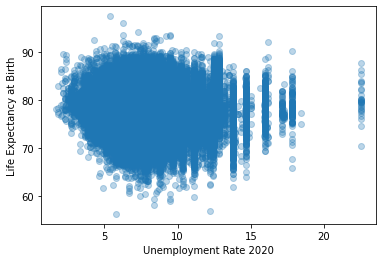

In [89]:
# add color to basic scatterplot

fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter( df_final['Unemployment_rate_2020'], df_final['e(0)'], alpha = 0.3)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("Unemployment Rate 2020")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Life Expectancy at Birth")

plt.savefig('scatter_unemployment.png')

plt.show()

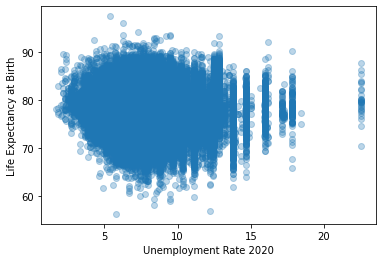

In [89]:
# add color to basic scatterplot

fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter( df_final['Unemployment_rate_2020'], df_final['e(0)'], alpha = 0.3)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("Unemployment Rate 2020")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Life Expectancy at Birth")

plt.savefig('scatter_unemployment.png')

plt.show()

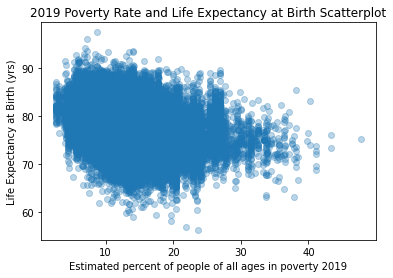

In [91]:
# add color to basic scatterplot

fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter( df_final['PCTPOVALL_2019'], df_final['e(0)'], alpha = 0.3)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("Estimated percent of people of all ages in poverty 2019")
ax.set_ylabel("Life Expectancy at Birth (yrs)")

# Add the title
ax.set_title("2019 Poverty Rate and Life Expectancy at Birth Scatterplot")


plt.savefig('scatter_poverty.png')

plt.show()

<a class="anchor" id="summary"></a>

# SUMMARY:

## Life Expectancy at Birth

1.  Source data covers areas at the US Census Tract ID level.  A US State is composed of various counties.  A single county may be composed of many US Census Tracts.
2.  CDC data covers forty-eight US States and District of Columbia.  Two US States, Maine and Wisconsin, are not included in data.
3.  Ten entries have 'TRACT ID' values that could not be linked to US State and County information.  These ten entries are located in Arkansas and Alaska.

## Unemployment

1.  Data covers areas found in Life Expectancy data at the US State and County level.
2.  Three additional geographic locations not included in life expectancy dataset.  Maine, Wisconsin, and Puerto Rico.
3.  Significant # of NAN values spread across the dataset.

## Income

1.  Dataset covers areas found in Life Expectancy data at the US State and County level.
2.  Three additional geographic locations not included in life expectancy dataset.  Maine, Wisconsin, and Puerto Rico.
3.  Significant # of NAN values spread across the dataset.  However, amount of NAN values as a percentage of the total number of values in any particular column is less than 3%.


## Education

1.  Dataset covers areas found in Life Expectancy data at the US State and County level.
2.  Three additional geographic locations not included in life expectancy dataset.  Maine, Wisconsin, and Puerto Rico.
3.  Significant # of NAN values spread across the dataset.  However, amount of NAN values as a percentage of the total number of values in any particular column is less than 3%.

## Poverty


1.  Dataset covers areas found in Life Expectancy data at the US State and County level.
2.  Two additional geographic locations not included in life expectancy dataset.  Maine and Wisconsin.
3.  Significant # of NAN values spread across the dataset.  Following categories are missing values for nearly entries:

- CI90LB04_2019	90% confidence interval lower bound of estimate of children ages 0 to 4 in poverty 2019
- CI90UB04_2019	90% confidence interval upper bound of estimate of children ages 0 to 4 in poverty 2019
- PCTPOV04_2019	Estimated percent of children ages 0 to 4 in poverty 2019
- CI90LB04P_2019	90% confidence interval lower bound of estimate of percent of children ages 0 to 4 in poverty 2019
- CI90UB04P_2019	90% confidence interval upper bound of estimate of percent of children ages 0 to 4 in poverty 2019


All datasets were combined into a single dataframe, df_id_edu_emp_pov using FIPS State and County codes.